In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# CS482 Final Code

In [ ]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn import preprocessing, tree, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier 

from keras import callbacks
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam

import timeit

In [ ]:
path = "/content/drive/MyDrive/weatherAUS.csv"
aus = pd.read_csv(path)
aus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# Dataset Cleaning and Prep

In [ ]:
aus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
# Get list of categorical variables
s = (aus.dtypes == "object")
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


In [ ]:
aus.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday            0
RainTomorrow         0
dtype: int64

In [ ]:
# Missing values in categorical variables

for i in object_cols:
    print(i, aus[i].isnull().sum())

Date 0
Location 0
WindGustDir 10326
WindDir9am 10566
WindDir3pm 4228


In [ ]:
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for i in object_cols:
    aus[i] = label_encoder.fit_transform(aus[i])
    
aus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  int64  
 1   Location       145460 non-null  int64  
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    145460 non-null  int64  
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     145460 non-null  int64  
 10  WindDir3pm     145460 non-null  int64  
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
#pd.to_numeric(aus.RainTomorrow)
#aus.RainTomorrow

In [ ]:
aus.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,396,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,397,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,398,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,399,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,400,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


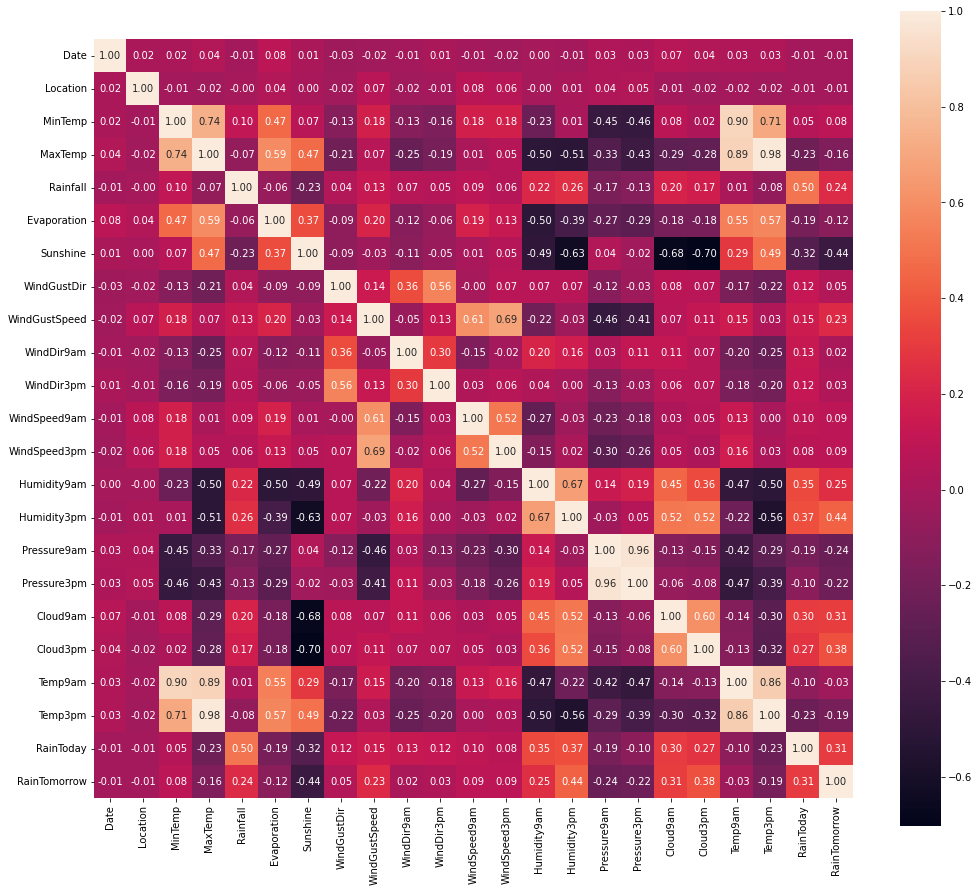

In [ ]:
plt.figure(figsize=(17,15))
ax = sns.heatmap(aus.corr(), square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)          
plt.show()

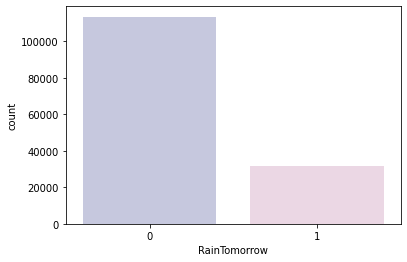

In [ ]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
cols= ["#C2C4E2","#EED4E5"]
sns.countplot(x= aus["RainTomorrow"], palette= cols)

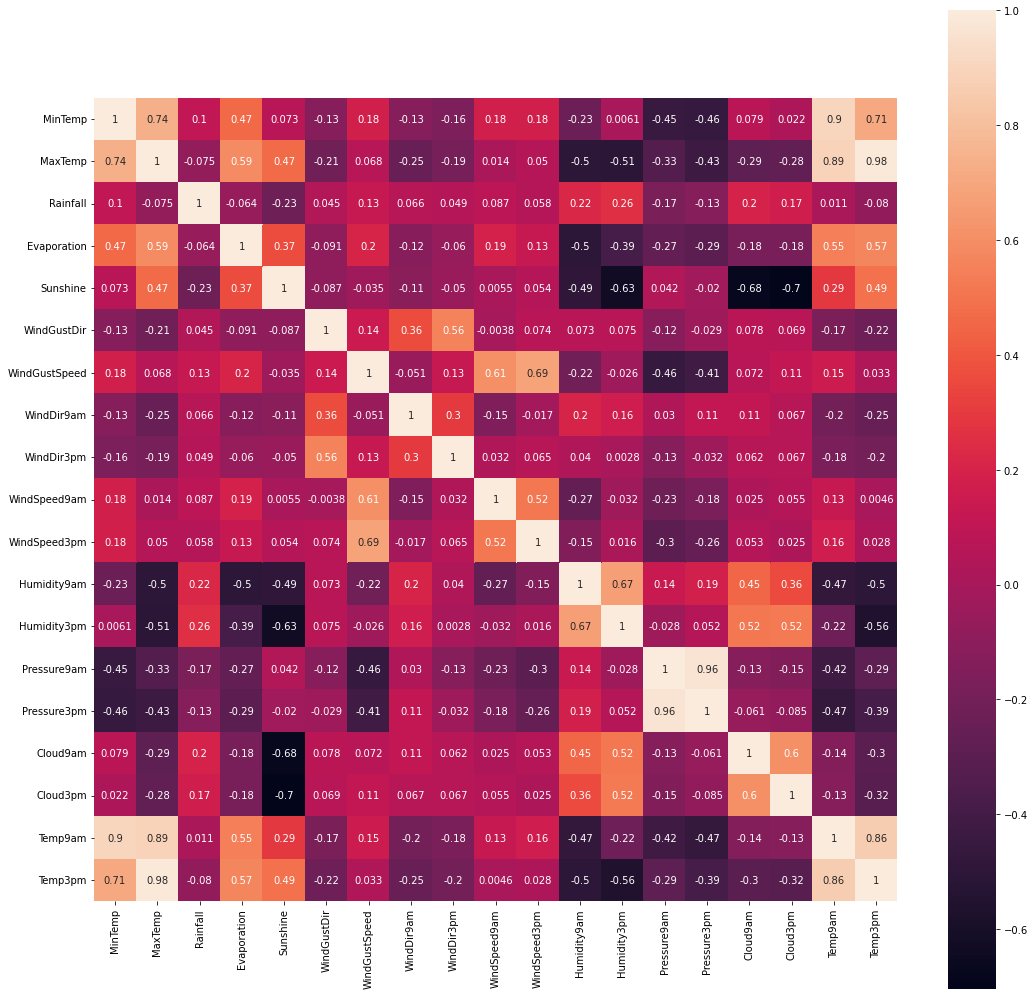

In [ ]:
# Correlation amongst numeric attributes
Dropped = aus.drop(['RainTomorrow', 'Date', 'Location', 'RainToday'], axis=1) 
corrmat = Dropped.corr()
# cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,annot=True, square=True)

In [ ]:
categorical_col, contin_val=[],[]

for i in aus.columns:
    
    if aus[i].dtype == 'object':
        categorical_col.append(i)
    else:
        contin_val.append(i)
        
print(categorical_col)
print(contin_val)

[]
['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


In [ ]:
aus.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        17
WindGustSpeed      67
WindDir9am         17
WindDir3pm         17
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [ ]:
aus.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir          0
WindGustSpeed    10263
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday            0
RainTomorrow         0
dtype: int64

In [ ]:
aus['RainToday'].value_counts()
aus['RainToday'].isnull().sum()

0

In [ ]:
aus['RainTomorrow'].value_counts()
aus['RainTomorrow'].isnull().sum()

0

In [ ]:
(aus.isnull().sum()/len(aus))*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       0.000000
WindGustSpeed     7.055548
WindDir9am        0.000000
WindDir3pm        0.000000
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         0.000000
RainTomorrow      0.000000
dtype: float64

In [ ]:
aus['MinTemp']=aus['MinTemp'].fillna(aus['MinTemp'].mean())
aus['MaxTemp']=aus['MinTemp'].fillna(aus['MaxTemp'].mean())
aus['Rainfall']=aus['Rainfall'].fillna(aus['Rainfall'].mean())
aus['Evaporation']=aus['Evaporation'].fillna(aus['Evaporation'].mean())
aus['Sunshine']=aus['Sunshine'].fillna(aus['Sunshine'].mean())
aus['WindGustSpeed']=aus['WindGustSpeed'].fillna(aus['WindGustSpeed'].mean())
aus['WindSpeed9am']=aus['WindSpeed9am'].fillna(aus['WindSpeed9am'].mean())
aus['WindSpeed3pm']=aus['WindSpeed3pm'].fillna(aus['WindSpeed3pm'].mean())
aus['Humidity9am']=aus['Humidity9am'].fillna(aus['Humidity9am'].mean())
aus['Humidity3pm']=aus['Humidity3pm'].fillna(aus['Humidity3pm'].mean())
aus['Pressure9am']=aus['Pressure9am'].fillna(aus['Pressure9am'].mean())
aus['Pressure3pm']=aus['Pressure3pm'].fillna(aus['Pressure3pm'].mean())
aus['Cloud9am']=aus['Cloud9am'].fillna(aus['Cloud9am'].mean())
aus['Cloud3pm']=aus['Cloud3pm'].fillna(aus['Cloud3pm'].mean())
aus['Temp9am']=aus['Temp9am'].fillna(aus['Temp9am'].mean())
aus['Temp3pm']=aus['Temp3pm'].fillna(aus['Temp3pm'].mean())

print(aus.shape)

(145460, 23)


In [ ]:
aus.RainToday.dtype

dtype('int64')

In [ ]:
aus

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,396,2,13.4,13.4,0.6,5.468232,7.611178,13,44.00000,13,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,397,2,7.4,7.4,0.0,5.468232,7.611178,14,44.00000,6,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,398,2,12.9,12.9,0.0,5.468232,7.611178,15,46.00000,13,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,399,2,9.2,9.2,0.0,5.468232,7.611178,4,24.00000,9,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,400,2,17.5,17.5,1.0,5.468232,7.611178,13,41.00000,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,3431,41,2.8,2.8,0.0,5.468232,7.611178,0,31.00000,9,...,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,0,0
145456,3432,41,3.6,3.6,0.0,5.468232,7.611178,6,22.00000,9,...,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,0,0
145457,3433,41,5.4,5.4,0.0,5.468232,7.611178,3,37.00000,9,...,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,0,0
145458,3434,41,7.8,7.8,0.0,5.468232,7.611178,9,28.00000,10,...,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,0,0


In [ ]:
aus['WindDir9am'] = aus['WindDir9am'].fillna(aus['WindDir9am'].mode()[0])
aus['WindGustDir'] = aus['WindGustDir'].fillna(aus['WindGustDir'].mode()[0])
aus['WindDir3pm'] = aus['WindDir3pm'].fillna(aus['WindDir3pm'].mode()[0])

In [ ]:
(aus.isnull().sum()/len(aus))*100

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

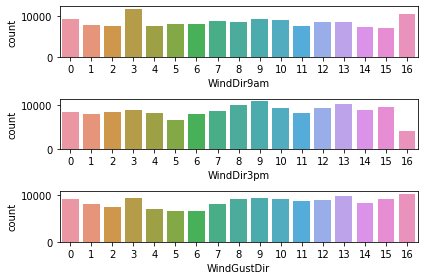

<Figure size 720x720 with 0 Axes>

In [ ]:
fig, ax =plt.subplots(3,1)
plt.figure(figsize=(10,10))

sns.countplot(data=aus,x='WindDir9am',ax=ax[0])
sns.countplot(data=aus,x='WindDir3pm',ax=ax[1])
sns.countplot(data=aus,x='WindGustDir',ax=ax[2])
fig.tight_layout()

In [ ]:
#aus=aus.iloc[:,1:]
aus

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,396,2,13.4,13.4,0.6,5.468232,7.611178,13,44.00000,13,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,397,2,7.4,7.4,0.0,5.468232,7.611178,14,44.00000,6,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,398,2,12.9,12.9,0.0,5.468232,7.611178,15,46.00000,13,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,399,2,9.2,9.2,0.0,5.468232,7.611178,4,24.00000,9,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,400,2,17.5,17.5,1.0,5.468232,7.611178,13,41.00000,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,3431,41,2.8,2.8,0.0,5.468232,7.611178,0,31.00000,9,...,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,0,0
145456,3432,41,3.6,3.6,0.0,5.468232,7.611178,6,22.00000,9,...,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,0,0
145457,3433,41,5.4,5.4,0.0,5.468232,7.611178,3,37.00000,9,...,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,0,0
145458,3434,41,7.8,7.8,0.0,5.468232,7.611178,9,28.00000,10,...,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,0,0


In [ ]:
ausClean = aus.dropna()
ausClean.isnull

<bound method DataFrame.isnull of         Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        396         2     13.4     13.4       0.6     5.468232  7.611178   
1        397         2      7.4      7.4       0.0     5.468232  7.611178   
2        398         2     12.9     12.9       0.0     5.468232  7.611178   
3        399         2      9.2      9.2       0.0     5.468232  7.611178   
4        400         2     17.5     17.5       1.0     5.468232  7.611178   
...      ...       ...      ...      ...       ...          ...       ...   
145455  3431        41      2.8      2.8       0.0     5.468232  7.611178   
145456  3432        41      3.6      3.6       0.0     5.468232  7.611178   
145457  3433        41      5.4      5.4       0.0     5.468232  7.611178   
145458  3434        41      7.8      7.8       0.0     5.468232  7.611178   
145459  3435        41     14.9     14.9       0.0     5.468232  7.611178   

        WindGustDir  WindGustSpeed  WindD

# Random Forest Classifier

In [ ]:
# Random Forest Classifer
start = timeit.default_timer()

X = aus.drop(['RainTomorrow', 'Date', 'Location', 'RainToday'], axis=1) 

#ausClean['RainToday'] = ausClean['RainToday'].replace({'No': 0, 'Yes': 1, 'NA': 0})
#ausClean['RainTomorrow'] = ausClean['RainTomorrow'].replace({'No': 0, 'Yes': 1, 'NA': 0})

y = aus.RainTomorrow

# partition the dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# grow a random forest with 500 trees and 3 randomly chosen attributes 
clf = RandomForestClassifier(n_estimators=500, criterion='gini', max_features= 3, bootstrap=True, oob_score=True)
model_rf = clf.fit(X_train, y_train)
pred = clf.predict(X_test) 
conf=confusion_matrix(pred, y_test)
print(conf)
print(classification_report(y_test, pred))

stop = timeit.default_timer()
RFCTime = stop - start
print('Time: ', RFCTime)

[[43364  6620]
 [ 1919  6281]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     45283
           1       0.77      0.49      0.60     12901

    accuracy                           0.85     58184
   macro avg       0.82      0.72      0.75     58184
weighted avg       0.85      0.85      0.84     58184

Time:  115.478649945


In [ ]:
model_rf.n_features_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


19

In [ ]:
aus.RainToday.dtype

dtype('int64')

# Preceptron Neural Network

In [ ]:
# Preceptron Neural Network
start = timeit.default_timer()
# Slices the features of the dataset
# X = aus[['Rainfall', 'Evaporation', 'RainToday']]
# X = aus[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',	'Humidity3pm',	'Pressure9am',	'Pressure3pm',	'Cloud9am',	'Cloud3pm',	'Temp9am', 'Temp3pm',	'RainToday',	'RainTomorrow']]
X = aus.drop(['RainTomorrow', 'Date', 'Location', 'RainToday'], axis=1) 
y = aus[['RainTomorrow']]

# Scales the features
scaler = StandardScaler()
XScaled = pd.DataFrame(scaler.fit_transform(X), columns=[X])

# Splits the data into train and test sets
XTrain, XTest, yTrain, yTest = train_test_split(XScaled, y, test_size=0.2, random_state=123)

# Initializes and fits a perceptron model
#initializes a perceptron model with a maximum of 2000 epochs and a learning rate of 0.15
#An epoch is an iteration of weight updates over all instances in the training data. 
pModel = Perceptron(eta0=0.1, max_iter=1500)
pModel.fit(XTrain, np.ravel(yTrain))

print(X.columns, pModel.coef_)
print(pModel.intercept_)

stop = timeit.default_timer()
PNNTime = stop - start
print('Time: ', PNNTime)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm'],
      dtype='object') [[ 0.0919055   0.0919055   0.42970066 -0.3349146  -0.2786877   0.00587153
   0.20660849 -0.50361281  0.5070296   0.36152686  0.18460136 -0.19175698
   0.6504696   0.39954516 -0.9549456   0.1840204  -0.47644227 -0.0844107
  -0.15576438]]
[-1.4]
Time:  0.32530309500000953


# Decision Tree Classifier

In [ ]:
# Decision Tree Classifier
start = timeit.default_timer()
# X = aus[['Rainfall', 'Evaporation', 'RainToday']]
y = aus[['RainTomorrow']]

# partition the dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# construct a classification tree from the training data
#tree.DecisionTreeClassifier?
clf = tree.DecisionTreeClassifier(min_samples_split = 20) 
model = clf.fit(X_train, y_train)

#tree.plot_tree(model, feature_names = X.columns, label = None, impurity = True,  class_names= ["0", "1"], rounded = True,filled = True, proportion = True)
#plt.show()

# test the classification tree
pred = clf.predict(X_test) 

# calculate the accuracy
print(clf.score(X_test, y_test))
print()


# construct the confusion matrix
print(confusion_matrix(pred, y_test))
print(classification_report(y_test, pred))

stop = timeit.default_timer()
DTCTime = stop - start
print('Time: ', DTCTime)

0.8034167468719923

[[40125  6280]
 [ 5158  6621]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88     45283
           1       0.56      0.51      0.54     12901

    accuracy                           0.80     58184
   macro avg       0.71      0.70      0.71     58184
weighted avg       0.80      0.80      0.80     58184

Time:  1.6874584919999904


In [ ]:
metrics.recall_score(pred, y_test)

0.5621020460140929

In [ ]:
metrics.precision_score(pred, y_test)

0.5132160297651345

In [ ]:
f1_score(pred, y_test)

0.536547811993517

# SVM

In [ ]:
# SVM part 1
# X = aus[['Rainfall', 'Evaporation', 'RainToday']]
Y = aus[['RainTomorrow']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=20220621)
# Scale the input variable because SVM is dependent on differences in scale for distances
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# SVM part 2
start = timeit.default_timer()

ausSVMlinear = svm.SVC(kernel = 'linear', C = 0.01)
ausSVMlinear.fit(X_train_scaled,Y_train)
Y_pred = ausSVMlinear.predict(X_test_scaled)
stop = timeit.default_timer()
SVMTime = stop - start
print('Time: ', SVMTime)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(y_test, pred))


# more can be done here with gamma and degree. See week 9 for more information.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Time:  324.940987899
[[27237  1251]
 [ 4400  3477]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88     45283
           1       0.56      0.51      0.54     12901

    accuracy                           0.80     58184
   macro avg       0.71      0.70      0.71     58184
weighted avg       0.80      0.80      0.80     58184



# Linear Regression

In [ ]:
# Linear Regression
start = timeit.default_timer()

X = aus["Cloud9am"].values
Y = aus["Cloud9am"].values
# math = aus['RainTomorrow'].values

df1 = pd.DataFrame(X, columns = ["X"])
df2 = pd.DataFrame(Y, columns = ["Y"])

M = pd.concat([df1, df2], axis=1)

model1 = smf.ols('X ~ Y', data = M).fit()

print(model1.summary())

stop = timeit.default_timer()
print('Time: ', stop - start)

                            OLS Regression Results                            
Dep. Variable:                      X   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.583e+33
Date:                Tue, 22 Nov 2022   Prob (F-statistic):               0.00
Time:                        03:00:14   Log-Likelihood:             4.4928e+06
No. Observations:              145460   AIC:                        -8.986e+06
Df Residuals:                  145458   BIC:                        -8.986e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.163e-15   5.39e-17    -95.827      0.0

In [ ]:
#x = aus.drop(['RainTomorrow', 'Date'], axis=1) 

In [ ]:
# See heatmap, use Dropped = aus.drop(['RainTomorrow', 'Date', 'Location', 'RainToday'], axis=1) as opposed to X for the alogrithms.

In [ ]:
X = aus.drop(["RainTomorrow"], axis=1)
y = aus["RainTomorrow"]

# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X.shape

(145460, 22)

# Sequential Neural Network

In [ ]:
# Sequential Neural Network
start = timeit.default_timer()

#Early stopping
early_stopping = callbacks.EarlyStopping(min_delta=0.001, patience=20, restore_best_weights=True)

# Initialising
model = Sequential()

# Creating layers
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 22))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training
history = model.fit(X_train, y_train, batch_size = 32, epochs = 25, callbacks=[early_stopping], validation_split=0.2)

stop = timeit.default_timer()
ANNTime = stop - start
print('Time: ', ANNTime)

Epoch 1/25
2910/2910 [==============================] - 10s 3ms/step - loss: 0.5472 - accuracy: 0.7792 - val_loss: 0.4605 - val_accuracy: 0.7823
Epoch 2/25
2910/2910 [==============================] - 8s 3ms/step - loss: 0.4410 - accuracy: 0.8025 - val_loss: 0.4087 - val_accuracy: 0.8241
Epoch 3/25
2910/2910 [==============================] - 10s 3ms/step - loss: 0.4242 - accuracy: 0.8201 - val_loss: 0.3898 - val_accuracy: 0.8360
Epoch 4/25
2910/2910 [==============================] - 10s 3ms/step - loss: 0.4194 - accuracy: 0.8217 - val_loss: 0.3861 - val_accuracy: 0.8372
Epoch 5/25
2910/2910 [==============================] - 8s 3ms/step - loss: 0.4157 - accuracy: 0.8218 - val_loss: 0.3846 - val_accuracy: 0.8357
Epoch 6/25
2910/2910 [==============================] - 9s 3ms/step - loss: 0.4132 - accuracy: 0.8238 - val_loss: 0.3887 - val_accuracy: 0.8390
Epoch 7/25
2910/2910 [==============================] - 8s 3ms/step - loss: 0.4112 - accuracy: 0.8212 - val_loss: 0.3876 - val_accura

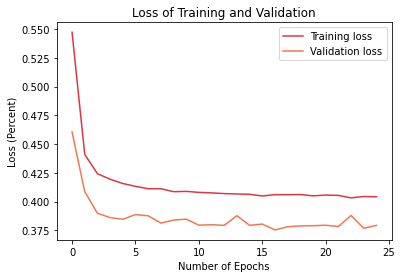

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#e13342", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#f37651", label='Validation loss')
plt.title('Loss of Training and Validation')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss (Percent)')
plt.legend(loc="best")

plt.show()

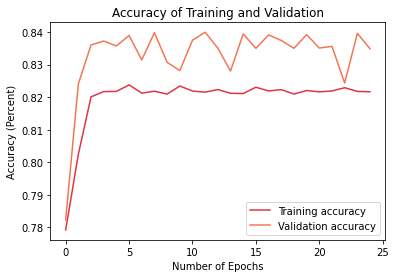

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#e13342", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#f37651", label='Validation accuracy')

plt.title('Accuracy of Training and Validation')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy (Percent)')
plt.legend()
plt.show()

In [ ]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

910/910 [==============================] - 1s 1ms/step


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[22090   582]
 [ 4302  2118]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90     22672
           1       0.78      0.33      0.46      6420

    accuracy                           0.83     29092
   macro avg       0.81      0.65      0.68     29092
weighted avg       0.83      0.83      0.80     29092



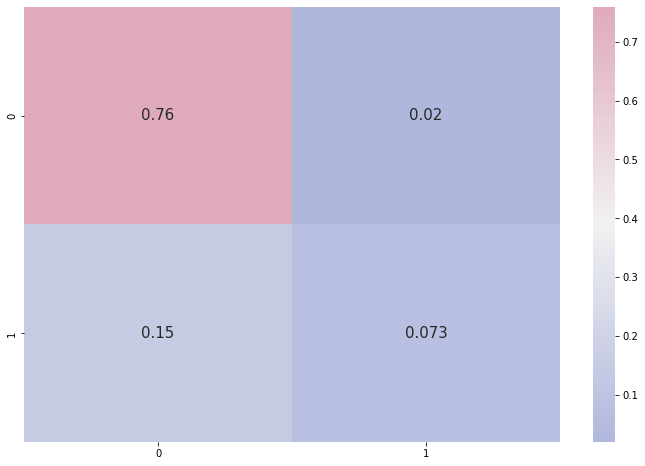

In [ ]:
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [ ]:
start = timeit.default_timer()
X = aus.drop(['RainTomorrow'], axis = 1)
y = aus['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.84


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
conf = confusion_matrix(y_test, y_pred)
print(conf)

[[35530  1837]
 [ 5889  4746]]


In [ ]:
print(classification_report(y_test, y_pred))

stop = timeit.default_timer()
LRTime = stop - start
print('Time: ', LRTime)

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     37367
           1       0.72      0.45      0.55     10635

    accuracy                           0.84     48002
   macro avg       0.79      0.70      0.73     48002
weighted avg       0.83      0.84      0.82     48002

Time:  2.656685589999938



# Code Visualization

<BarContainer object of 5 artists>

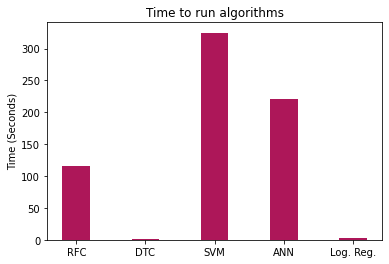

In [ ]:
# Plotting Time
# create data
x = np.arange(5)
y1 = [RFCTime, DTCTime, SVMTime, ANNTime, LRTime]
width = 0.40

plt.ylabel('Time (Seconds)')
plt.title('Time to run algorithms')
plt.xticks(x, ('RFC', 'DTC', 'SVM', 'ANN', 'Log. Reg.'))

# plot data in grouped manner of bar type
plt.bar(x, y1, width, color = '#ad1759')

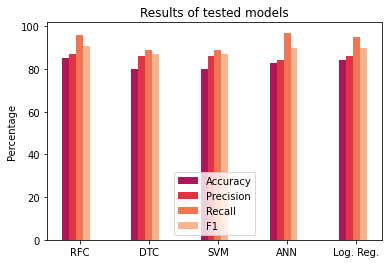

In [ ]:
# Comparing Algorithms
# create data
x = np.arange(5)
acc = [85, 80, 80, 83, 84]
pre = [87, 86, 86, 84, 86]
rec = [96, 89, 89, 97, 95]
f1 = [91, 87, 87, 90, 90]
width = 0.1
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, acc, width, color='#ad1759')
plt.bar(x-0.1, pre, width, color='#e13342')
plt.bar(x, rec, width, color='#f37651')
plt.bar(x+0.1, f1, width, color='#f6b48f')
plt.xticks(x, ['RFC', 'DTC', 'SVM', 'ANN', 'Log. Reg.'])
plt.ylabel("Percentage")
plt.title('Results of tested models')
plt.legend(["Accuracy", "Precision", "Recall", "F1"])
plt.show()

In [ ]:
countY = 0
countN = 0
for i in range(0, len(aus['RainTomorrow'])):
    
    if aus['RainTomorrow'][i] == 1: 
      countY += 1
    elif aus['RainTomorrow'][i] == 0:
      countN += 1

print(f"{countY}, {countN}")

31877, 113583


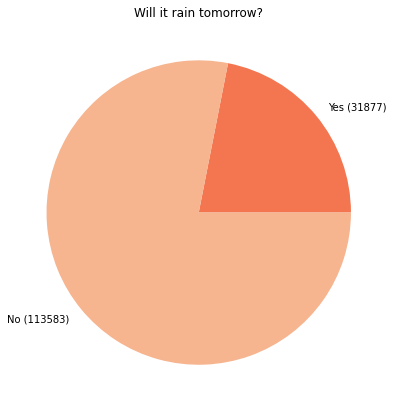

In [ ]:
# Creating dataset
RT = [f'Yes ({countY})', f'No ({countN})']

data = [countY, countN]
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = RT, colors = ["#f37651", "#f6b48f"])
plt.title('Will it rain tomorrow?')
# show plot
plt.show()